## Implémentation de régression linéaire multiple avec Descente de gradient  



    Réalisé Par: AKHADAM Ayoub

In [39]:
library(ggplot2)
library(dplyr)
library(broom)
library(ggpubr)
library(RColorBrewer)

## Jeu de données

>The Fish Market Dataset contient des informations sur les espèces de poissons courantes vendues sur les marchés. Le 
     jeu de données comprend l'espèce de poisson (species), le poids (weight), la longueur(length) , la hauteur (height) et 
     la largeur (width). 

>Ce jeu de données est un enregistrement de 7 espèces de poissons différentes et courantes dans les ventes de la 
    poissonnerie. Grâce à cet ensemble de données, un modèle prédictif peut être réalisé pour prédire le poids du poisson.

    Specie : Nom de l'espèce du poisson
    Weight : Poids du poisson en grammes
    Length1 : Longueur verticale en cm
    Length2 : Longueur diagonale en cm
    Length3 : Longueur transversale en cm
    Height : Hauteur en cm
    Width : Largeur diagonale en cm

### Chargement des données

In [40]:
fish.data <- read.csv("fish.csv")
colnames(fish.data)[1] <- "Species"
head(fish.data)

,Species,Weight,Length1,Length2,Length3,Height,Width
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bream,242,23.2,25.4,30.0,11.5200,4.0200
2,Bream,290,24.0,26.3,31.2,12.4800,4.3056
3,Bream,340,23.9,26.5,31.1,12.3778,4.6961
4,Bream,363,26.3,29.0,33.5,12.7300,4.4555
5,Bream,430,26.5,29.0,34.0,12.4440,5.1340
6,Bream,450,26.8,29.7,34.7,13.6024,4.9274


In [41]:
summary(fish.data)

   Species              Weight          Length1         Length2     
 Length:159         Min.   :   0.0   Min.   : 7.50   Min.   : 8.40  
 Class :character   1st Qu.: 120.0   1st Qu.:19.05   1st Qu.:21.00  
 Mode  :character   Median : 273.0   Median :25.20   Median :27.30  
                    Mean   : 398.3   Mean   :26.25   Mean   :28.42  
                    3rd Qu.: 650.0   3rd Qu.:32.70   3rd Qu.:35.50  
                    Max.   :1650.0   Max.   :59.00   Max.   :63.40  
    Length3          Height           Width      
 Min.   : 8.80   Min.   : 1.728   Min.   :1.048  
 1st Qu.:23.15   1st Qu.: 5.945   1st Qu.:3.386  
 Median :29.40   Median : 7.786   Median :4.248  
 Mean   :31.23   Mean   : 8.971   Mean   :4.417  
 3rd Qu.:39.65   3rd Qu.:12.366   3rd Qu.:5.585  
 Max.   :68.00   Max.   :18.957   Max.   :8.142  

> Notre variable expliqué est le poids. Les variables explicatives sont les différentes longueurs, la "hauteur" et le "largeur".

In [42]:
# Vérification s'il ya des valeurs manquantes :
sum(is.na(fish.data))

[1] 0

In [20]:
unique(fish.data$Species)

[1] "Bream"     "Roach"     "Whitefish" "Parkki"    "Perch"     "Pike"     
[7] "Smelt"

In [6]:
# Les différentes espèces et leur nombre :
table(fish.data$Species)


    Bream    Parkki     Perch      Pike     Roach     Smelt Whitefish 
       35        11        56        17        20        14         6 

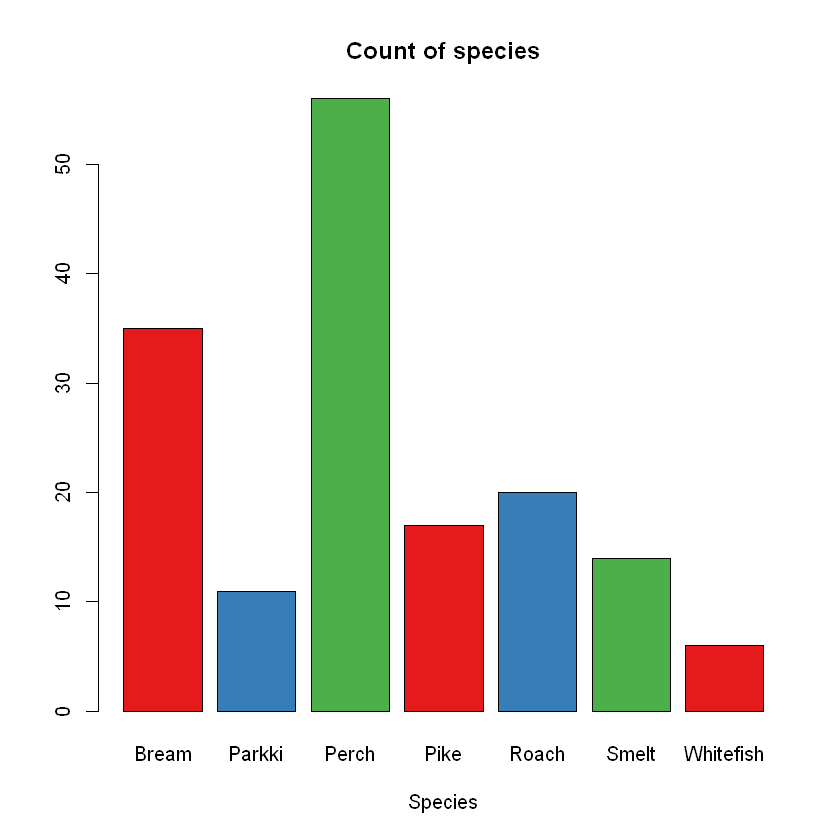

In [21]:
coul <- brewer.pal(3, "Set1") 
t = table(fish.data$Species)
barplot(t, main="Count of species", xlab="Species",col=coul)

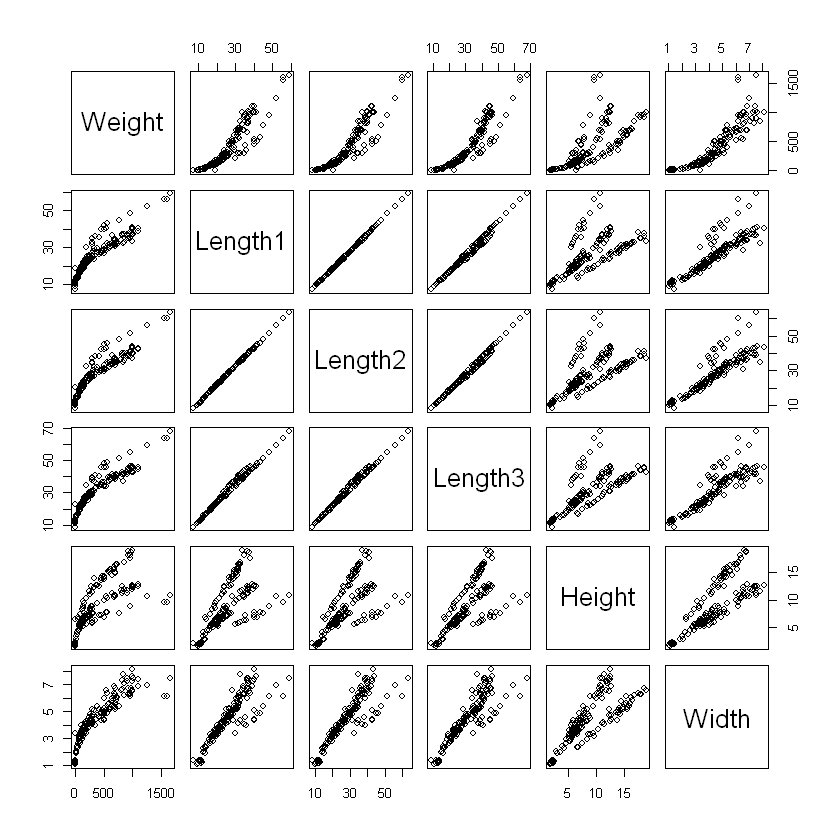

In [43]:
df <- fish.data
df <- select(fish.data, Weight, Length1, Length2, Length3, Height, Width)

# Variable expliqué
weight <- df$Weight

# Variables explicatives
length1 <- df$Length1
length2 <- df$Length2
length3 <- df$Length3 
height <- df$Height
width <- df$Width

plot(df)

In [44]:
### Matrice de correlation
round(cor(df), digits= 2)

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.00,0.92,0.92,0.92,0.72,0.89
Length1,0.92,1.00,1.00,0.99,0.63,0.87
Length2,0.92,1.00,1.00,0.99,0.64,0.87
Length3,0.92,0.99,0.99,1.00,0.70,0.88
Height,0.72,0.63,0.64,0.70,1.00,0.79
Width,0.89,0.87,0.87,0.88,0.79,1.00


> La plupart des coeffecients de correlation entre les variables est proches de 1 , donc il y a une forte relation entre les variables.

## Modèle

In [45]:
fit <- lm(weight ~  + length1 + length2 + length3 + height + width, data=df)

In [46]:
summary(fit)


Call:
lm(formula = weight ~ +length1 + length2 + length3 + height + 
    width, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-243.69  -65.10  -25.52   57.98  447.25 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -499.587     29.572 -16.894  < 2e-16 ***
length1       62.355     40.209   1.551  0.12302    
length2       -6.527     41.759  -0.156  0.87601    
length3      -29.026     17.353  -1.673  0.09643 .  
height        28.297      8.729   3.242  0.00146 ** 
width         22.473     20.372   1.103  0.27169    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 123.2 on 153 degrees of freedom
Multiple R-squared:  0.8853,	Adjusted R-squared:  0.8815 
F-statistic: 236.2 on 5 and 153 DF,  p-value: < 2.2e-16


>Dans notre exemple, on peut voir que p-value est < 2.2e-16, ce qui est hautement significatif. Cela signifie qu'au moins une des variables prédictives est liée à la variable weight.

In [135]:
# Check the results for the first data 
data_to_predict <- data.frame(length1=length1[1], length2=length2[1], length3=length3[1], height=height[1], width=width[1])

# Predicted value
print(predict(fit, data_to_predict))

# Real value
print(weight[1])

       1 
326.8161 
[1] 242


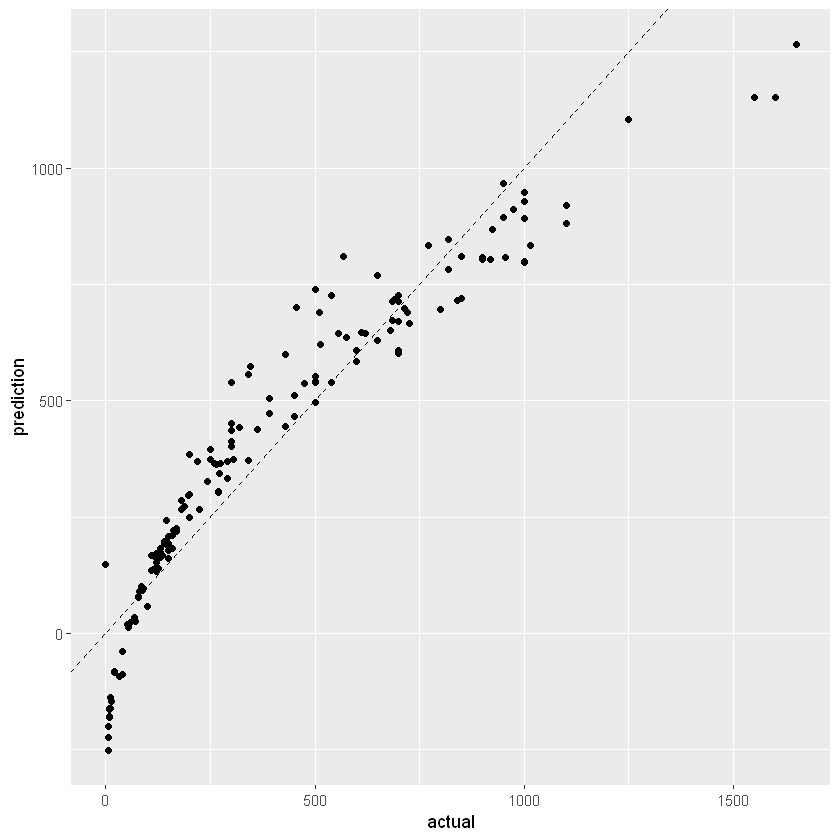

In [48]:
pred = predict(fit,df)
act = weight

tst = data.frame(Species = fish.data$Species,prediction = pred,actual = act)
tst = mutate(tst,delta = prediction - actual)

ggplot(tst ,
       aes(x=actual,
           y=prediction)
      )+ geom_point() + geom_abline(intercept = 0, slope = 1, linetype="dashed")+annotate(geom="text", x=200, y=900,
        label=paste(""),color="black")

## Descente Gradient  

In [49]:
GradD <- function(x, y, alpha = 0.0006, epsilon = 10^-10, max_iter= 500){
  iter <- 0
  i <- 0
  x <- cbind(1, x)
    
  theta <- matrix(0,ncol(x),1)
  
    
    cost <- (1/(2*nrow(x))) * t(x %*% theta - y) %*% (x %*% theta - y)
  delta <- 1
    
  while(delta > epsilon && i < max_iter){
      
    i <- i + 1
    theta <- theta - (alpha / nrow(x)) * (t(x) %*% (x %*% theta - y))
    cval <- (1/(2*nrow(x))) * t(x %*% theta - y) %*% (x %*% theta - y)
    cost <- append(cost, cval)
    delta <- abs(cost[i+1] - cost[i])
    if((cost[i+1] - cost[i]) > 0){
      print("The cost is increasing.  Try reducing alpha.")
      return()
    }
    iter <- append(iter, i)
  }
  print(sprintf("Completed in %i iterations.", i))
  print(sprintf("Final cost %f iterations.", cval))
  plot(cost, xlab="iteration", ylab="cost")
  return(theta)
}

[1] "Completed in 10000 iterations."
[1] "Final cost 23301.057174 iterations."


,-2.821600
length1,4.949946
length2,4.895675
length3,4.671264
height,4.403201
width,1.424535


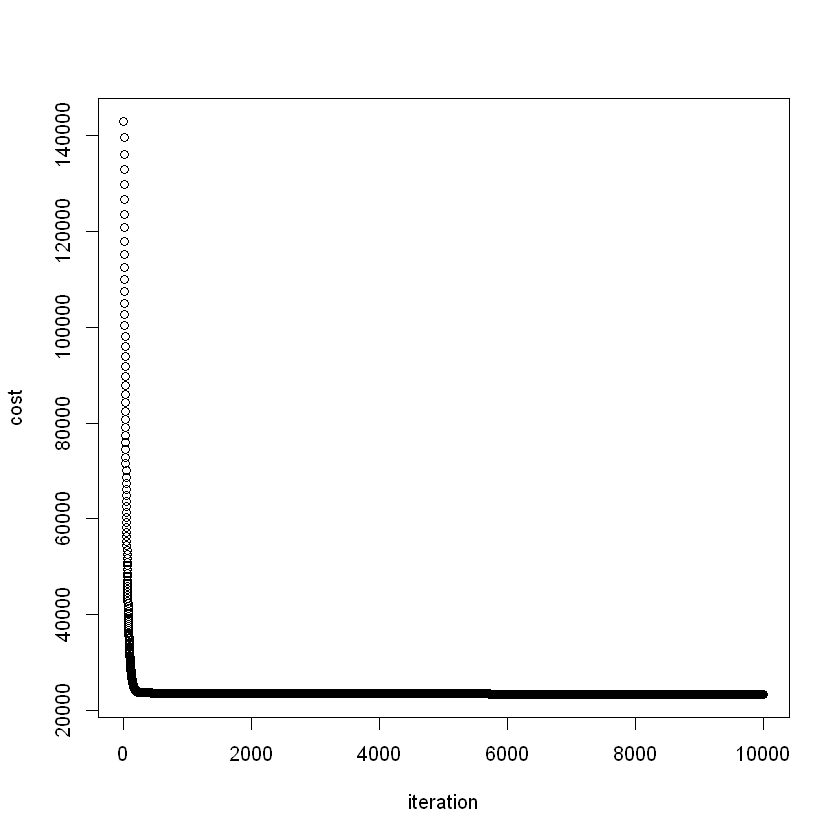

In [171]:
x = cbind(length1, length2, length3, height, width)
y = matrix(weight,nrow = length(weight), ncol=1)

#theta <- GradD(x, y, alpha = 0.0000006, epsilon = 10^-10, max_iter = 10000)
theta <- GradD(x, y, alpha = 0.000005, epsilon = 10^-10, max_iter = 10000)
theta

In [172]:
# Check the results for the first data 

h <- theta[1] + theta[2]* length1[1] + theta[3]* length2[1] + theta[3]*length3[1] + theta[4]*height[1] + theta[5]*width[1]

# Predicted value
print(h)

# Real value
print(weight[1])


[1] 454.7514
[1] 242


>On trouve pas des bonnes résultats.